In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/data

In [3]:
articles_df = pd.read_csv("../data/articles.csv")

In [4]:
articles_df.shape

(105542, 25)

In [5]:
customers_df = pd.read_csv("../data/customers.csv")

In [6]:
customers_df.shape

(1371980, 7)

In [7]:
articles_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [8]:
transactions_df = pd.read_csv("../data/transactions_train.csv")

In [9]:
transactions_df.shape

(31788324, 5)

In [10]:
articles_df.sample(n=5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
103970,917434003,917434,Cyrilla tank top,253,Vest top,Garment Upper body,1010016,Solid,8,Dark Grey,...,Jersey,A,Ladieswear,1,Ladieswear,6,Womens Casual,1005,Jersey Fancy,Fitted vest top in ribbed cotton jersey with a...
105121,933373001,933373,Class Kant hoop,70,Earring,Accessories,1010016,Solid,5,Gold,...,Jewellery,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Hexagonal earrings. The zinc content of the ea...
43192,675689001,675689,Salvia shorts.,274,Shorts,Garment Lower body,1010016,Solid,9,Black,...,Basic 1,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,Short shorts in sweatshirt fabric with an elas...
14409,562702001,562702,KRISTOFF fancy polo,255,T-shirt,Garment Upper body,1010017,Stripe,73,Dark Blue,...,Young Boy Jersey Basic,I,Children Sizes 134-170,4,Baby/Children,72,Boys Underwear & Basics,1002,Jersey Basic,Polo shirt in organic cotton jersey with a rib...
24002,607664003,607664,Carmen,258,Blouse,Garment Upper body,1010016,Solid,9,Black,...,Blouse,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1010,Blouses,Sleeveless blouse woven in a cotton blend with...


In [11]:
customers_df.sample(n=5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1080734,c9a9c5c8b250d2fdf02cefb150c76fcded41bda6b58362...,NaN,NaN,ACTIVE,NONE,41.0,cf81833a5687bccabad6e0501c027e248651e462469133...
148204,1b9ec76c9ac15594749680b4271c484f133b184de3d6c2...,NaN,NaN,ACTIVE,NONE,53.0,9ef3ef5a8a4a8a375c049167128790b5cecec380617f8c...
353666,422346b9895c52212fc579a01c49c153d0c9acd0fc5f41...,NaN,NaN,ACTIVE,NONE,77.0,bb9abc4ac6da339046521c65df26d37cb280fe2d3ea080...
638447,7725b27ff2acdb164805605a2597320ab3337b1116c1ad...,1.0,1.0,ACTIVE,Regularly,27.0,fab0a120d1a06500e6e1059096d54f1eb730cfaa306d80...
290237,36325daf680cb8403b65b1edd62ba191c33dcc5e3993da...,NaN,NaN,ACTIVE,NONE,21.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [12]:
transactions_df.sample(n=5)

,t_dat,customer_id,article_id,price,sales_channel_id
7021422,2019-03-06,3abc8a7dc37add74bc57828b2430ff1d4bd8423cb80e40...,661147008,0.025407,2
28980149,2020-07-13,d570f3e2cfd4065a2a87734556fb9ab429fcfc2918c291...,857812007,0.022017,2
9013540,2019-04-20,0ec5c8fdf7b0c451ed08ae635a873a032bceb425f356c0...,697091007,0.033186,1
9349081,2019-04-25,fe2669db167fe2753cf1e4a309f2ab7442bca6bd33a857...,756633003,0.025407,1
25577427,2020-05-10,3182a862868e3853d079655ec813231b9dc0d421910046...,828251002,0.050831,2


In [13]:
transactions_df['t_dat'].min()

'2018-09-20'

In [14]:
transactions_df['t_dat'].max()

'2020-09-22'

In [15]:
transactions_df.head(n=10)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
5,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2
6,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492,1
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373,1
9,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,598859003,0.045746,2


In [16]:
transactions_df.tail(n=10)

,t_dat,customer_id,article_id,price,sales_channel_id
31788314,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,701472004,0.010153,2
31788315,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,456163087,0.033881,2
31788316,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,832505003,0.025407,2
31788317,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,902288001,0.022017,2
31788318,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,856440002,0.042356,2
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2


In [17]:
articles_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [18]:
articles_df['prod_name'].value_counts()

Dragonfly dress             98
Mike tee                    72
Wow printed tee 6.99        70
1pk Fun                     55
TP Paddington Sweater       54
                            ..
MIRISSA tank                 1
Russ high top                1
MAISY Tee 2-pack             1
Co-lab Emma Jayne romper     1
Katsu Trousers               1
Name: prod_name, Length: 45875, dtype: int64

In [19]:
articles_df['prod_name'].nunique()

45875

- There are almost 45875 unique products in the dataset

In [20]:
articles_df['product_group_name'].nunique()

19

In [21]:
articles_df['product_group_name'].value_counts()

Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64

[Text(0, 0, 'Garment Upper body'),
 Text(1, 0, 'Underwear'),
 Text(2, 0, 'Socks & Tights'),
 Text(3, 0, 'Garment Lower body'),
 Text(4, 0, 'Accessories'),
 Text(5, 0, 'Items'),
 Text(6, 0, 'Nightwear'),
 Text(7, 0, 'Unknown'),
 Text(8, 0, 'Underwear/nightwear'),
 Text(9, 0, 'Shoes'),
 Text(10, 0, 'Swimwear'),
 Text(11, 0, 'Garment Full body'),
 Text(12, 0, 'Cosmetic'),
 Text(13, 0, 'Interior textile'),
 Text(14, 0, 'Bags'),
 Text(15, 0, 'Furniture'),
 Text(16, 0, 'Garment and Shoe care'),
 Text(17, 0, 'Fun'),
 Text(18, 0, 'Stationery')]

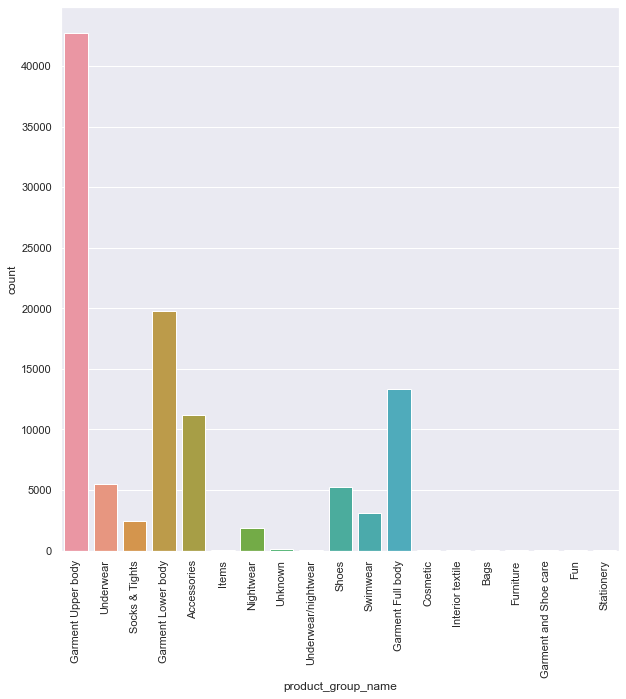

In [22]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x='product_group_name', data=articles_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Black'),
 Text(1, 0, 'White'),
 Text(2, 0, 'Off White'),
 Text(3, 0, 'Light Beige'),
 Text(4, 0, 'Beige'),
 Text(5, 0, 'Grey'),
 Text(6, 0, 'Light Blue'),
 Text(7, 0, 'Light Grey'),
 Text(8, 0, 'Dark Blue'),
 Text(9, 0, 'Dark Grey'),
 Text(10, 0, 'Pink'),
 Text(11, 0, 'Dark Red'),
 Text(12, 0, 'Greyish Beige'),
 Text(13, 0, 'Light Orange'),
 Text(14, 0, 'Silver'),
 Text(15, 0, 'Gold'),
 Text(16, 0, 'Light Pink'),
 Text(17, 0, 'Dark Pink'),
 Text(18, 0, 'Yellowish Brown'),
 Text(19, 0, 'Blue'),
 Text(20, 0, 'Light Turquoise'),
 Text(21, 0, 'Yellow'),
 Text(22, 0, 'Greenish Khaki'),
 Text(23, 0, 'Dark Yellow'),
 Text(24, 0, 'Other Pink'),
 Text(25, 0, 'Dark Purple'),
 Text(26, 0, 'Red'),
 Text(27, 0, 'Transparent'),
 Text(28, 0, 'Dark Green'),
 Text(29, 0, 'Other Red'),
 Text(30, 0, 'Turquoise'),
 Text(31, 0, 'Dark Orange'),
 Text(32, 0, 'Other'),
 Text(33, 0, 'Orange'),
 Text(34, 0, 'Dark Beige'),
 Text(35, 0, 'Other Yellow'),
 Text(36, 0, 'Light Green'),
 Text(37, 0, 'Othe

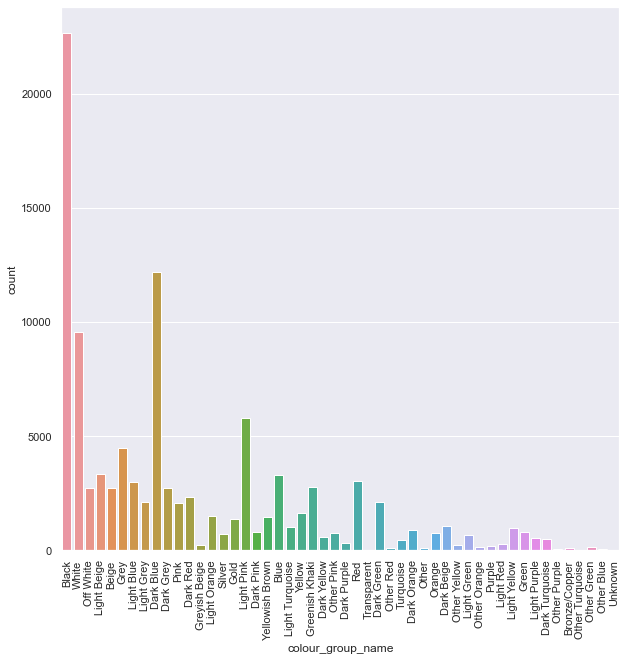

In [23]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x='colour_group_name', data=articles_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Jersey Basic'),
 Text(1, 0, 'Under-, Nightwear'),
 Text(2, 0, 'Socks and Tights'),
 Text(3, 0, 'Jersey Fancy'),
 Text(4, 0, 'Accessories'),
 Text(5, 0, 'Trousers Denim'),
 Text(6, 0, 'Outdoor'),
 Text(7, 0, 'Shoes'),
 Text(8, 0, 'Swimwear'),
 Text(9, 0, 'Knitwear'),
 Text(10, 0, 'Shirts'),
 Text(11, 0, 'Trousers'),
 Text(12, 0, 'Dressed'),
 Text(13, 0, 'Shorts'),
 Text(14, 0, 'Dresses Ladies'),
 Text(15, 0, 'Skirts'),
 Text(16, 0, 'Special Offers'),
 Text(17, 0, 'Blouses'),
 Text(18, 0, 'Unknown'),
 Text(19, 0, 'Woven/Jersey/Knitted mix Baby'),
 Text(20, 0, 'Dresses/Skirts girls')]

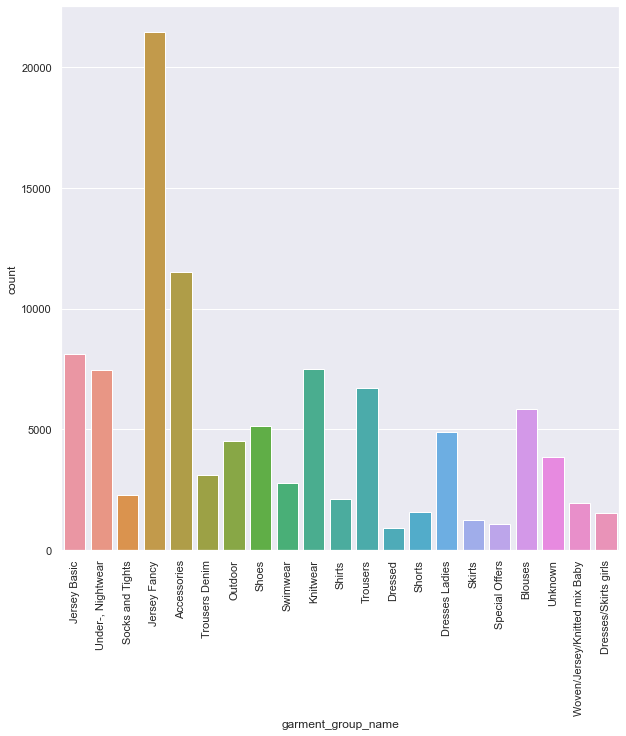

In [24]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x='garment_group_name', data=articles_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Ladieswear'),
 Text(1, 0, 'Baby/Children'),
 Text(2, 0, 'Menswear'),
 Text(3, 0, 'Sport'),
 Text(4, 0, 'Divided')]

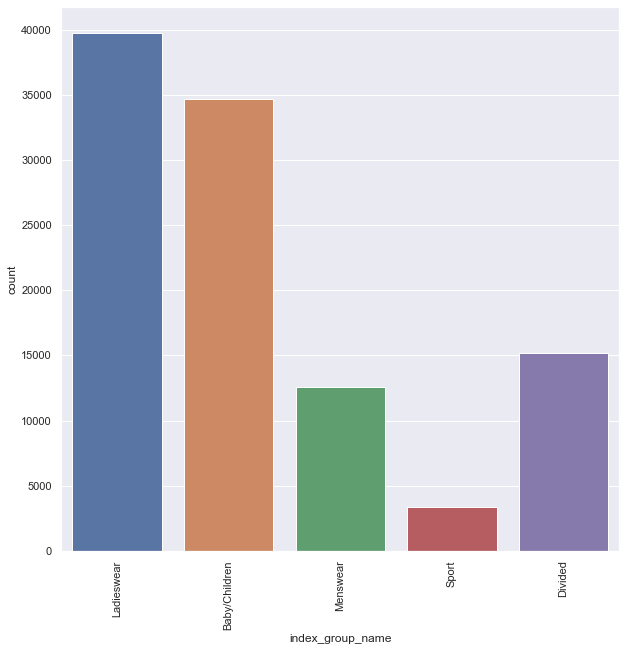

In [25]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x='index_group_name', data=articles_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [26]:
articles_df['detail_desc'].value_counts()

T-shirt in printed cotton jersey.                                                                                                                                                                                  159
Leggings in soft organic cotton jersey with an elasticated waist.                                                                                                                                                  138
T-shirt in soft, printed cotton jersey.                                                                                                                                                                            137
Socks in a soft, jacquard-knit cotton blend with elasticated tops.                                                                                                                                                 136
Fine-knit trainer socks in a soft cotton blend with elasticated tops.                                                                       

In [27]:
customers_df.shape

(1371980, 7)

In [28]:
customers_df.sample(n=10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
292168,36904f936f6c352bf883edf017e26ee7fb4061afe9ab3e...,1.0,1.0,ACTIVE,Regularly,21.0,3b0b9207ce5a308cb189b49eedecb024e8b7073f777b94...
154760,1cd5a8a0d40696311f36747f267932c1b0bf0177aa9545...,NaN,NaN,ACTIVE,NONE,43.0,2176807a06517e4165334435867feaf80eadaaa54adf47...
931366,adc314abbc148a7aa72a59d1dda8ea78276a9ea84600c9...,NaN,NaN,ACTIVE,NONE,25.0,9b7ff1c69a5023e85a11e5082971abb6218dda31ff8e2a...
326690,3d141c714d56aa31d6423a22b72f8c962ce3106aba6f00...,NaN,NaN,ACTIVE,NONE,33.0,031c9ad133c4f56d99242a747f18243a2fc290b54e73c1...
376630,466ee2f67aff9547e7a74a12405aaccdb057590155b993...,1.0,1.0,ACTIVE,Regularly,56.0,cab9c409bc1982c76f05e6be5bdeb6da3b50c9953b827d...
1354643,fcc1fdba5698307f0782e3bf40448372b6c574df408b3e...,NaN,NaN,ACTIVE,NONE,34.0,5256b9cdea13735c79b32949b5699ce150b51e969cde68...
112780,1504cb6a94a7b50ed0c52243248932e591e2c7efa1b3af...,NaN,NaN,ACTIVE,NONE,27.0,4a4e4afbd1ceb30c17a978e5377043d01963c644802c9e...
288118,35ce881977b0934e83d761cffcfa5c718d50a54d0fb267...,1.0,1.0,ACTIVE,Regularly,20.0,2d46b07367e58190f763c6309939f68fc73214617d1026...
317979,3b6dcd31f31e592201097f73d2b6b95d2a04d6c2a0688e...,1.0,1.0,ACTIVE,Regularly,21.0,210f2aa636b6e940f5c4e06e718647782b5f5cbe4c223d...
215535,2834a1421347b2156484a5f5f9e2f95edabd477d9abf31...,NaN,NaN,PRE-CREATE,NONE,NaN,adc54f0832c93e030e722dc5721f1b4f385244d7fdbcd8...


[Text(0, 0, 'ACTIVE'), Text(1, 0, 'PRE-CREATE'), Text(2, 0, 'LEFT CLUB')]

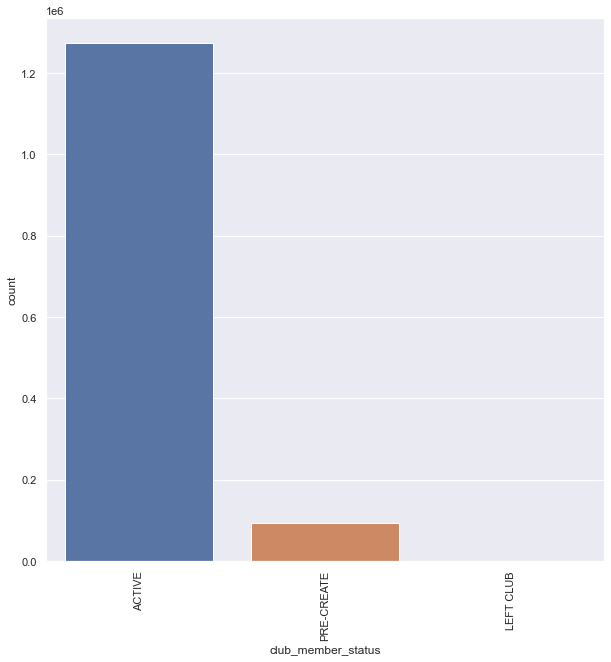

In [29]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x='club_member_status', data=customers_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [30]:
customers_df['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

- Most of them are active club members

- Exploring ages of the customers

In [31]:
ages = customers_df[['age']]

In [32]:
ages.columns

Index(['age'], dtype='object')

In [33]:
ages['age'].min()

16.0

In [34]:
bins = [16, 30, 40, 50, 60, 70, 120]
labels = ['16-29', '30-39', '40-49', '50-59', '60-69', '70+']
ages['age_range'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)

<ipython-input-34-9d5ad7920da3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages['age_range'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)


[Text(0, 0, '16-29'),
 Text(1, 0, '30-39'),
 Text(2, 0, '40-49'),
 Text(3, 0, '50-59'),
 Text(4, 0, '60-69'),
 Text(5, 0, '70+')]

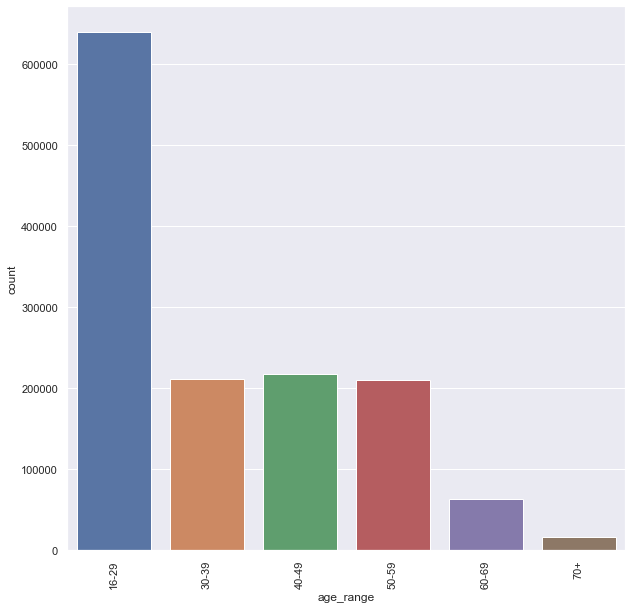

In [35]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x='age_range', data=ages)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

- Highest number of customers are between 16-29 years of age

In [36]:
customers_df['fashion_news_frequency'].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

- Label can be changed to None.

In [37]:
customers_df['postal_code'].nunique()

352899

In [38]:
transactions_df.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

- Let us calculate the number of products bought by each customer on average

In [39]:
number_of_prod = transactions_df.groupby(by='customer_id').agg({"article_id":"count"})

In [40]:
transactions_df['customer_id'].nunique()

1362281

In [41]:
transactions_df.shape

(31788324, 5)

In [42]:
number_of_prod.reset_index(inplace=True)

In [43]:
number_of_prod.max()

customer_id    ffffd9ac14e89946416d80e791d064701994755c3ab686...
article_id                                                  1895
dtype: object

In [44]:
ages_df = customers_df.groupby(by="customer_id").agg({"age":"unique"})

In [48]:
ages_df['age'] = ages_df['age'].apply(lambda x:x[0])

In [50]:
ages_df.reset_index(inplace=True)

In [51]:
bins = [16, 30, 40, 50, 60, 70, 120]
labels = ['16-29', '30-39', '40-49', '50-59', '60-69', '70+']
ages_df['age_range'] = pd.cut(ages_df.age, bins, labels = labels,include_lowest = True)

In [53]:
age_prod_merge = pd.merge(ages_df,number_of_prod, left_on=['customer_id'],right_on=['customer_id'])

In [55]:
age_prod_merge.rename(columns={'article_id':'avg_no_of_products'},inplace=True)

In [58]:
age_prod_merge['avg_no_of_products'].min()

1

In [59]:
age_prod_merge['avg_no_of_products'].max()

1895

/Users/saikrupa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_no_of_products'>

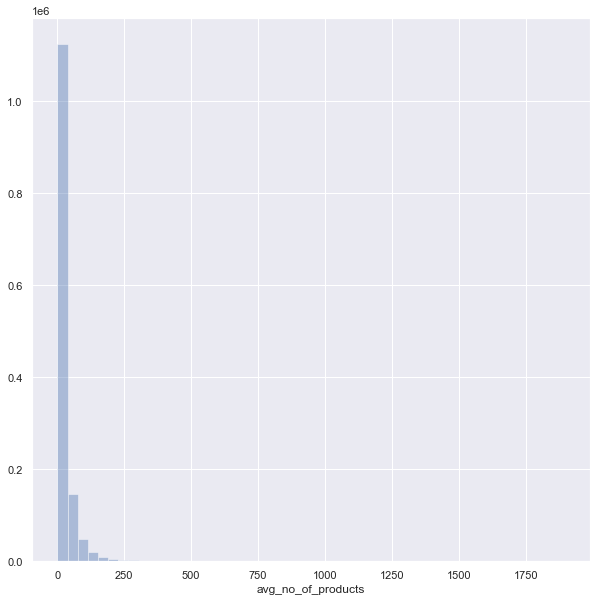

In [60]:
sns.distplot(a=age_prod_merge.avg_no_of_products, kde=False)

In [65]:
bins = [1, 5, 10, 20, 30, 40, 1895]
labels = ['1-5', '5-10', '10-20', '20-30', '30-40', '50+']
age_prod_merge['mean_no_prods'] = pd.cut(age_prod_merge.avg_no_of_products, bins, labels = labels,include_lowest = True)

In [66]:
age_prod_merge

,customer_id,age,age_range,avg_no_of_products,mean_no_prods
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,40-49,21,20-30
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,16-29,86,50+
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,16-29,18,10-20
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,50-59,2,1-5
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,50-59,13,10-20
...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,24.0,16-29,51,50+
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,21.0,16-29,84,50+
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,21.0,16-29,45,50+
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,18.0,16-29,7,5-10


In [69]:
age_prod_merge.dropna(inplace=True)

In [71]:
fig = px.treemap(age_prod_merge, path=['age_range','mean_no_prods'], 
                 values='avg_no_of_products', color='mean_no_prods')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()
#outer rectangles represent age
#inner rectangles represent the average number of products purchased in that particular age group